# SENG 480D Quantum Algorithms and Software Engineering

# Sophia Penner V00915678 - Portfolio

# Part 1

### Question 1. How did you get up to speed in basic linear algebra (e.g., Euler formula, linear transformations or operators, eigenvectors and eigenvalues) including which resources you consulted in the process?

The primary resource I used for reviewing the necessary linear algebra was the lecture slides provided in Brightspace [1]. I used the lecture slides for reviewing the following: complex conjugate, inverse, transpose, conjugate transpose, tensor product, unitary and hermitian definitions, and Euler's formula. 

I consulted an article by Andre Ye [2] for reviewing eigenvalues. 

The summary of my linear algebra review is shown below.

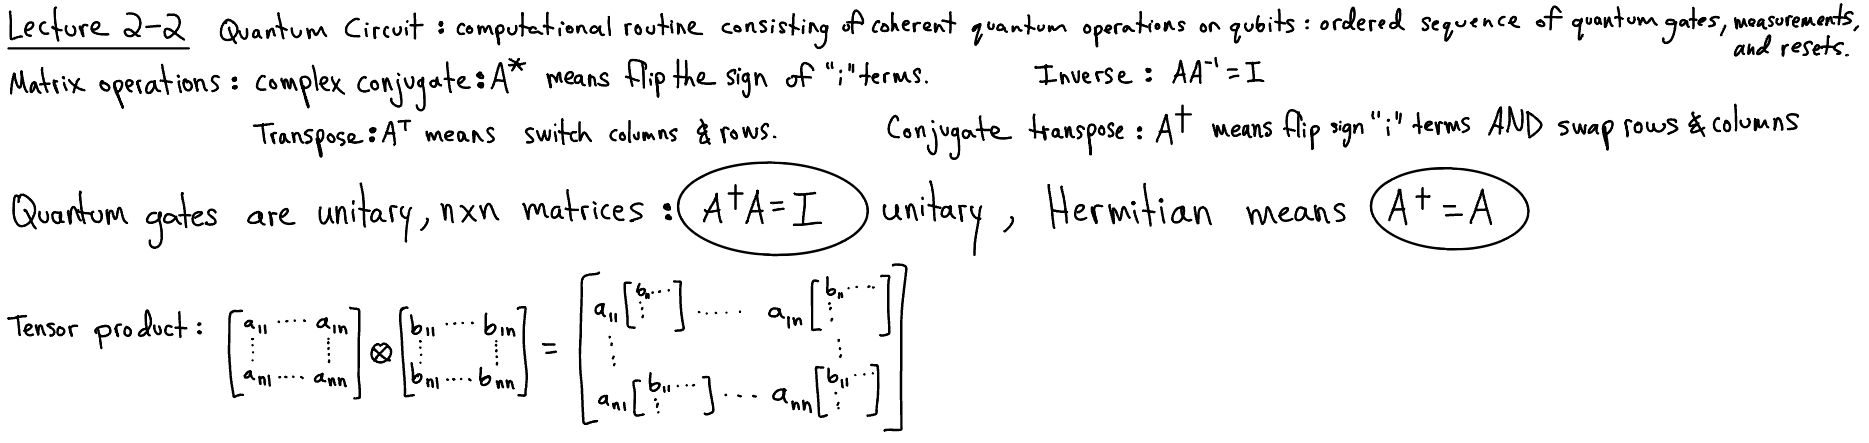

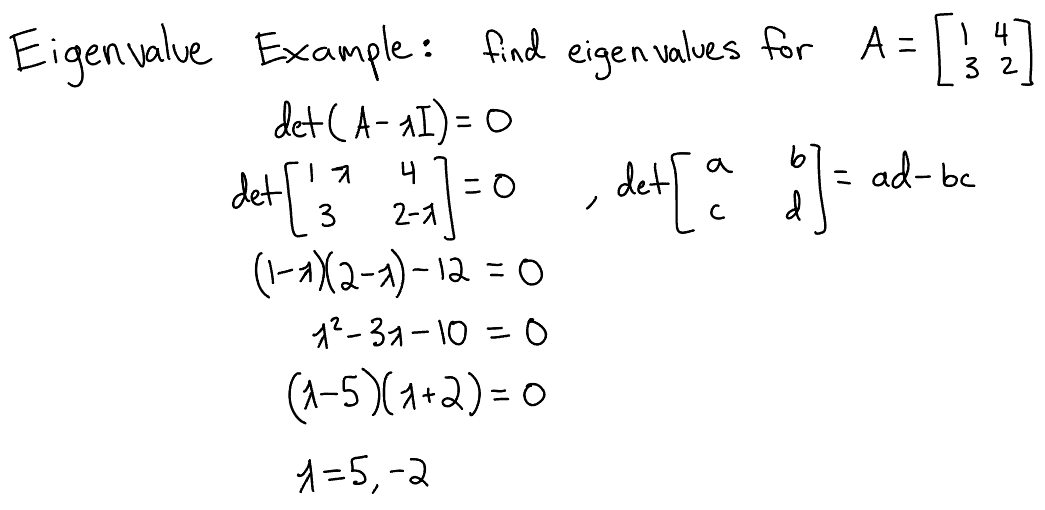

### Question 2. How did you get started documenting linear algebra formulas (e.g., Euler formula) using LaTeX Markdown in Jupyter Notebooks? Develop your own cheat sheet of the quantum computing formulas and Dirac notation to ease assignment typesetting.

I learned the basic notation for LaTeX Markdown using an article written by Khelifi Ahmed Aziz [3] and a stack overflow discussion [4]. My cheat sheet in development can be found below.

$$ \newcommand{\ket}[1]{\left|{#1}\right\rangle} $$
$$ \newcommand{\bra}[1]{\left\langle{#1}\right|} $$
Euler's identity: $$ e^{i \pi} + 1 = 0 $$
$$ e^{i \theta} = cos\theta + isin\theta $$
Qubit State: 
$$ \ket{\psi} = \alpha\ket{0} + \beta\ket{1}$$
Born Rule: $$ |\alpha|^2 + |\beta|^2 = 1 $$

Diffusion Operator from Grover's Algorithm: $$ D = H^{\otimes N}(2\ket{0}^{\otimes N}\bra{0}^{\otimes N} - I^{\otimes N})H^{\otimes N} $$

### Question 3. How did you get started and experienced running your first quantum circuits using IBM Qiskit and Microsoft QDK Q# Jupyter Notebook platforms?

I used the tutorial slides provided in Brightspace [1] for my first quantum circuits in IBM Qiskit and Microsoft Q#. The information included the application of quantum gates, measurements, and predicting statevectors for single and multi qubit circuits. Example circuits for both Qiskit and Q# are shown below.

In [1]:
from qiskit import QuantumCircuit, IBMQ, Aer, transpile, assemble, execute
from qiskit.quantum_info import Statevector

In [2]:
circuit=QuantumCircuit(2,2)
circuit.h(0)
circuit.h(1)
circuit.barrier()
circuit.cx(0,1)
circuit.barrier()
circuit.measure([0,1],[0,1])
backend = Aer.get_backend("statevector_simulator")
print(circuit)
result = execute(circuit, backend=backend, shots=1).result()
print('State Vector:', result.get_statevector() )

     ┌───┐ ░       ░ ┌─┐   
q_0: ┤ H ├─░───■───░─┤M├───
     ├───┤ ░ ┌─┴─┐ ░ └╥┘┌─┐
q_1: ┤ H ├─░─┤ X ├─░──╫─┤M├
     └───┘ ░ └───┘ ░  ║ └╥┘
c: 2/═════════════════╩══╩═
                      0  1 
State Vector: Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [7]:
import qsharp.azure
targets = qsharp.azure.connect(
    resourceId="/subscriptions/3071d026-6662-4f73-afd2-24447cede808/resourceGroups/azurequantum/providers/Microsoft.Quantum/Workspaces/480d-test",
    location="westus")

Connecting to Azure Quantum...

Connected to Azure Quantum workspace 480d-test in location westus.


In [8]:
import qsharp

In [10]:
%%qsharp
open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Measurement;

In [14]:
%%qsharp

operation sample() : (Result, Result) {

    use q = Qubit[2];
    
    H(q[0]);
    CNOT(q[0],q[1]);
    
    return (MResetZ(q[0]), MResetZ(q[1]));
}

### Question 4. How would you motivate other students to join the journey into quantum computing given the motivational materials presented in class and found in the references? Your answers to this question will likely evolve during this course. Revisit regularly.

I believe one of the greatest motivational factors is the potential for hybrid quantum computing. Quantum computing on its own can address extremely complex problems, for example, accurately simulating nature. However, that prospect may not be motivating for everyone because its career opportunities apply only to highly specialized individuals in specific industries. Hybrid quantum computing can be adapted and integrated into applications at different levels of intensity, and therefore can apply to a much more diverse population of students. 

### Question 5. What are your personal insights, aha moments, and epiphanies you experienced in the first part of your quantum learning journey?

I had an epiphany about using the tensor product to display quantum states at different locations in circuits. At first, it was difficult and confusing to manually calculate the quantum state for circuits, especially if there were multiple qubits, controlled gates, superposition, and entanglement. I had to retrace my steps and review the tensor product properties so that I could calculate the quantum states. Once I was comfortable with tensor product properties, manipulating the quantum state calculations was much more straightforward.

### Question 6. Which algorithm is your favourite quantum algorithm so far?

My favourite so far is the Deutsch-Jozsa Algorithm [5]. It is a significant algorithm because it was one of the first to demonstrate the advantages of quantum over classical computing. Aside from its history, it was an excellent learning experience. It was fascinating seeing the quantum theory applied to a practical problem. It helped me understand how superposition and measurement can be manipulated to solve a problem.

### Question 7. What was the most challenging part of understanding Grover's algorithm?

The most challenging part of understanding Grover's algorithm was the derivation of the diffusion oracle. Even though it was explained in lecture, I have had to try the calculations myself to solidify my understanding.
$$ \newcommand{\ket}[1]{\left|{#1}\right\rangle} $$
$$ \newcommand{\bra}[1]{\left\langle{#1}\right|} $$
$$ D = H^{\otimes N}(2\ket{0}^{\otimes N}\bra{0}^{\otimes N} - I^{\otimes N})H^{\otimes N} $$

# Part 2

### Question 1. Describe the Quantum Fourier Transform (QFT) algorithm. How is QFT used in quantum computing?

The Quantum Fourier Transform algorithm converts between two bases: the computational Z basis and the Fourier basis [1]. For a single qubit circuit, the QFT acts as a Hadamard gate and therefore states |0> and |1> become |+> and |->. For any multi-qubit circuit, QFT must introduce a two-qubit controlled rotation gate called CROTk. The resulting circuit is shown below [6].  

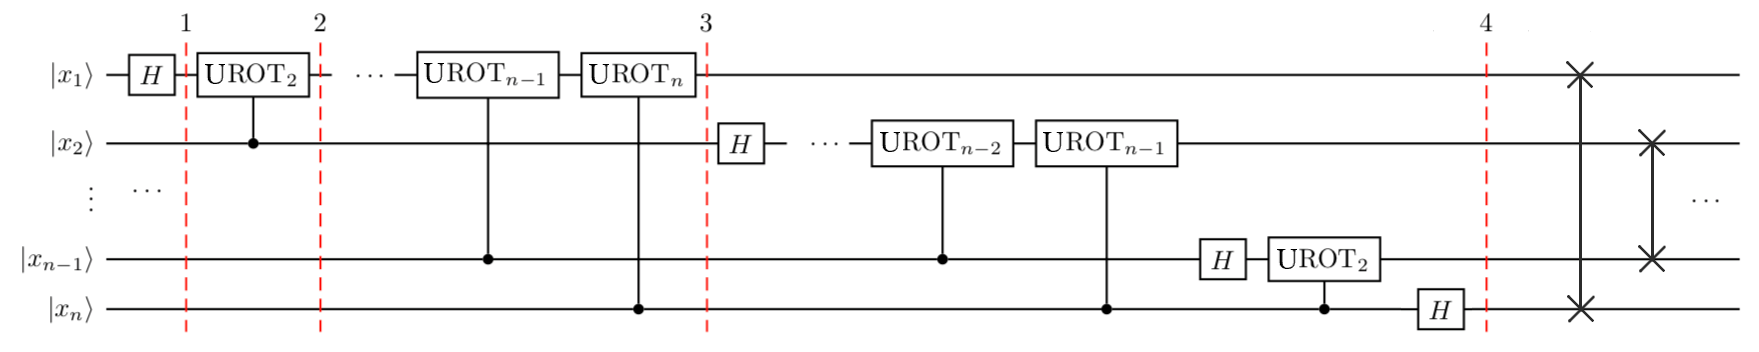

The Quantum Fourier Transform algorithm is the quantum implimentation of the discrete Fourier transform over the amplitudes of a wavefunction. It is a common building block in quantum computing, appearing in applications such as: computation of discrete logarithms, Shor's algorithm, and quantum phase estimation. 

### Question 2. Describe the Quantum Phase Estimation (QPE) algorithm. How is QPE used in quantum computing? 

The Quantum Phase Estimation algorithm is a subroutine to estimate the eigenvalue corresponding to the eigenvector of a unitary operator [1]. Specifically, we want to find theta such that:
$$ \newcommand{\ket}[1]{\left|{#1}\right\rangle} $$
$$ \newcommand{\bra}[1]{\left\langle{#1}\right|} $$
$$ U\ket{\psi} = e^{2 \pi i \theta}\ket{\psi}$$

The circuit for QPE can be split into two sections, estimation wires and target wires. There are "t" estimation wires that carry the counting qubits. The target wires carry the qubits in the state |𝜓⟩. The circuit undergoes a series of operations including H gates, controlled-U gates, QFT, and finally measurement. The circuit is shown below [7]:

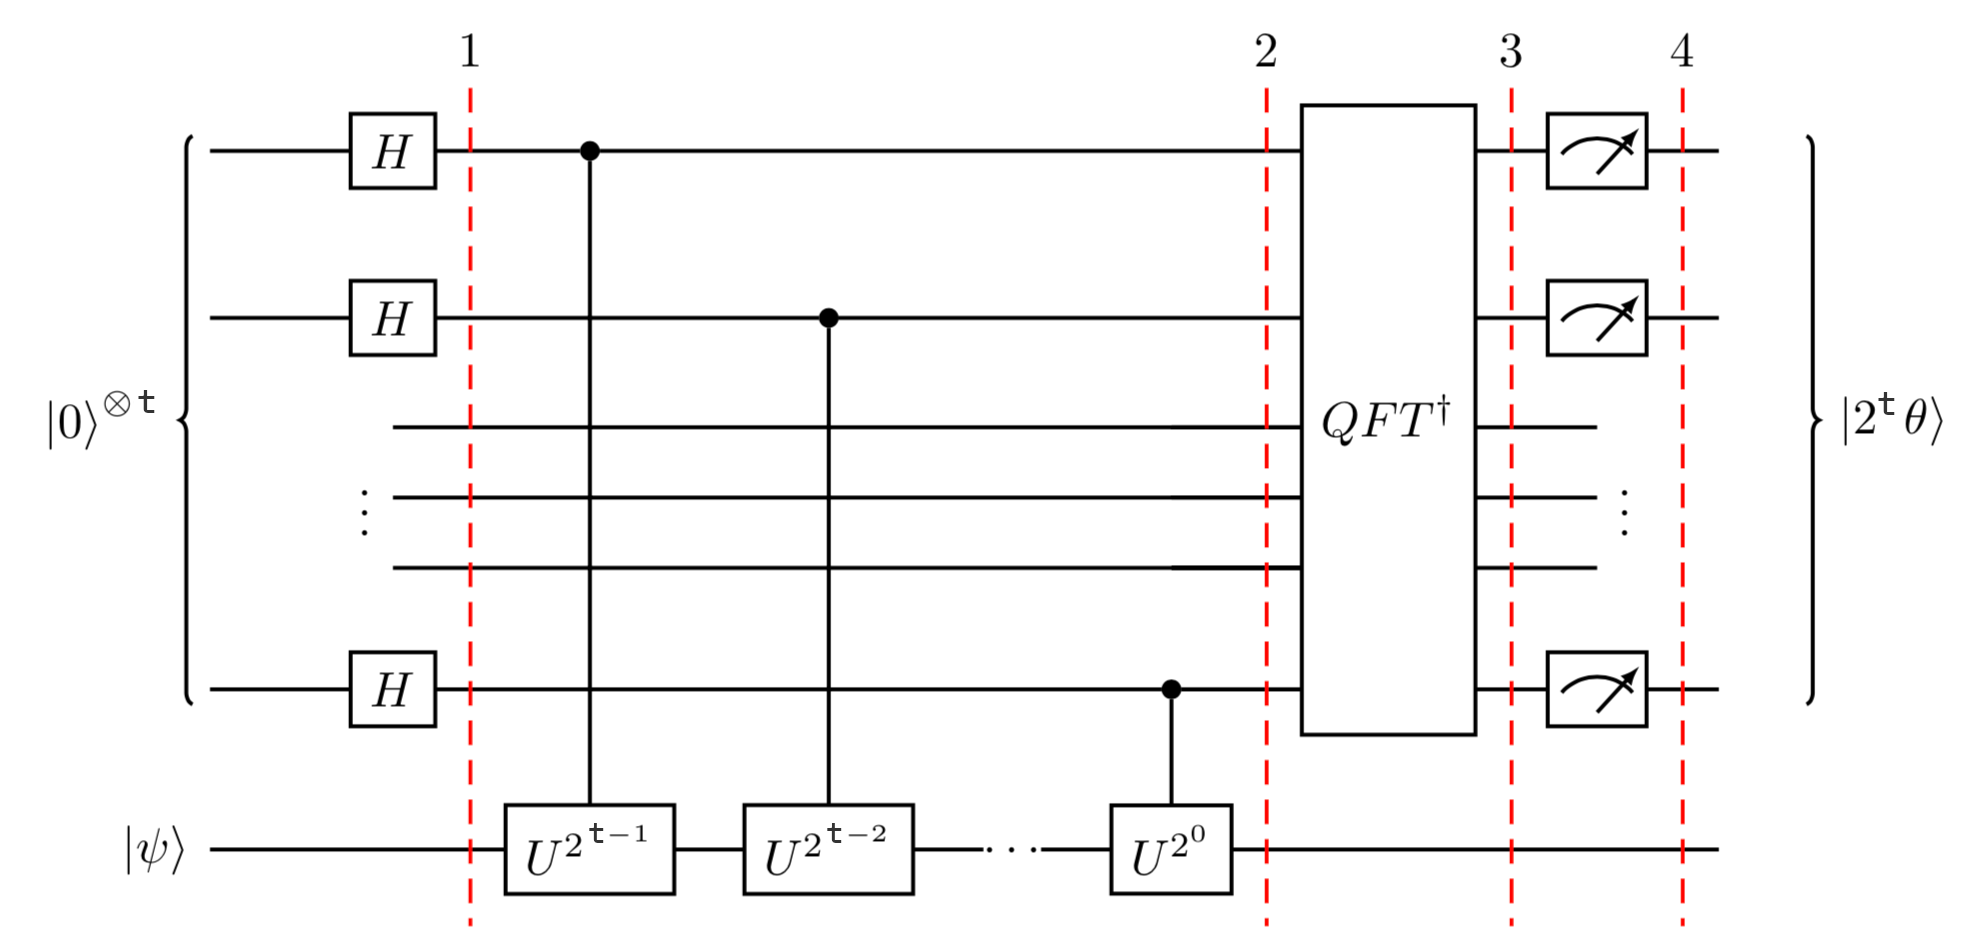

Similar to the Quantum Fourier Transform, the Quantum Phase Estimation algorithm is a frequently used building block amongst other algorithms. For example, the quantum algorithm for linear systems of equations and Shor's algorithm.

### Question 3. The most challenging part of understanding Grover's algorithm

Aside from the derivation of the diffusion oracle, I found the concept of phase kickback difficult to grasp at first. Within the context of Grover's algorithm, the phase kickback effect functions with the initialization of the 'output' qubit as illustrated below [8].

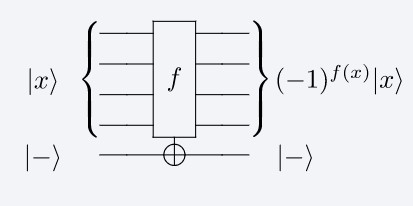

In order to understand this concept in Grover's algorithm, I had to review phase kickback. During this review, I learned how the phase of the control qubit can be changed instead of the target qubit. I learned how controlled-NOT gates are used alongside Hadamard Gates to achieve phase kickback, supported by the following theory:

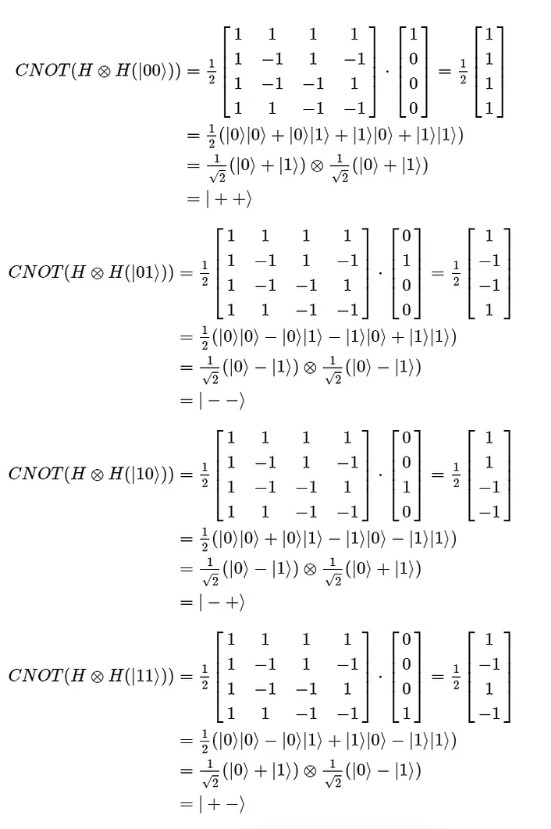

I found the following table helpful [9]:

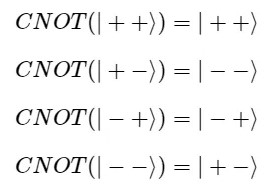

### Question 4. Which is your favourite quantum algorithm and why? 

My favourite quantum algorithm is Shor's algorithm [11]. Shor's algorithm is able to factor integers in polynomial time, as opposed to classical algorithms which require superpolynomial time. Shor's algorithm solves the factoring problem by converting it into a period finding problem, then applying Quantum Phase Estimation. This is significant because RSA, a common cryptosystem used for secure data transmission, relies on factoring being impossible for large enough integers. Shor's is my favourite algorithm because I am interested in cybersecurity and it could revolutionize the industry. It would inspire new, exciting, innovative solutions to keep our software applications secure.

The initial periodic function for Shor's algorithm can be represented as:
$$ f(x) = a^x mod N $$

Assuming that:
$$ a, N > 0 $$
$$ N > a $$
and a and N share no common factors.

The period, r, is the smallest non-zero integer such that: 
$$ a^r mod N = 1 $$

An example of this function can be seen below:

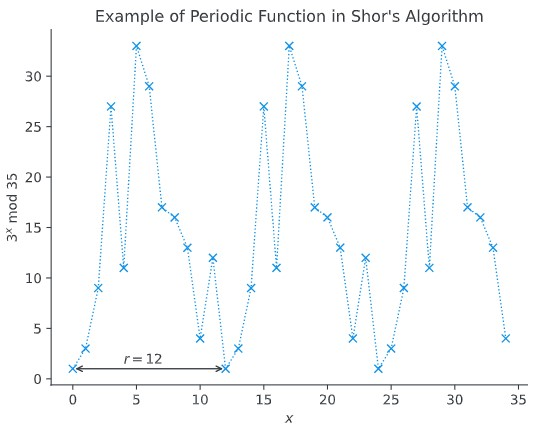

Shor's algorithm aims to find the period, r, by applying quantum phase estimation:
$$ \newcommand{\ket}[1]{\left|{#1}\right\rangle} $$
$$ \newcommand{\bra}[1]{\left\langle{#1}\right|} $$
$$ U\ket{y} = \ket{a y mod N} $$

This will reveal the possible eigenstates of U. Given a starting state of |1>, after r applications of U the state will return to |1>. After finding the eigenstates, the phase of the computational basis state |1> is:
$$ \phi = s/r $$

where s is a random integer between 0 and r-1.

To complete the solution, the continued fractions algorithm is applied to $ \phi $ to find r.

The final circuit diagram is shown below [11]:

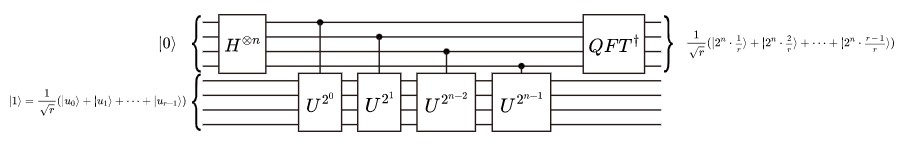

### Question 5. What is the role of eigenvalues and eigenstates in quantum computing? 

Eigenvalues and eigenvectors are foundational concepts in terms of key quantum characterizations such as matrices (Heisenberg) & waves (Schrödinger). A helpful shortcut for eigenvalues can be found below [1]:

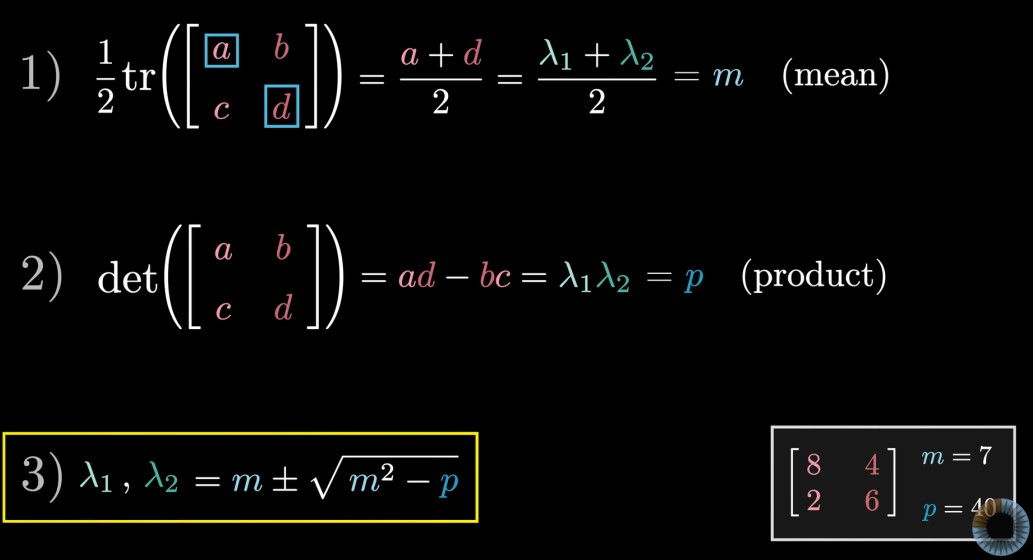

Eigenvalues and eigenvectors are mathematical expressions that can model real world behaviour. In quantum computing, this can be seen when applying a Hermitian operator to a quantum state. 
$$ \newcommand{\ket}[1]{\left|{#1}\right\rangle} $$
$$ \newcommand{\bra}[1]{\left\langle{#1}\right|} $$
$$ U\ket{\psi} = \lambda \ket{\psi} $$

Lambda, the eigenvalue, is the result of a measurement of an observable.
Psi, the eigenstate, represents the unambiguous state of observables.

For example, the Quantum Phase Estimation algorithm relies on eigenvalues, as described in Question 2. 
$$ U\ket{\psi} = e^{2 \pi i \theta}\ket{\psi}$$


### Question 6. Summarize the decomposition strategies presented in class for developing hybrid quantum-classical systems 

In order to develop a hybrid quantum-classical system, the entire quantum stack must be analyzed: from the definition of the problem to be solved all the way down to the circuits and programming languages.

Decomposition of the problem - Determine what sections of the problem can be solved classically as opposed to quantumly. Write solutions for each section then combine them to create the overall system.

Decomposition of algorithms - Identify which algorithms to apply. Identify which building blocks to apply (Quantum Fourier Transform, Quantum Phase Estimation, Grover's Algorithm, etc...). Apply techniques such as nature simulation (VQE) or optimization (QAOA).

Decomposition of programs - Select languages and libraries to execute the solutions. Identify components that could be executed by a simulator rather than a quantum computer. Determine if the program should be run on a cloud platform or agnostically.

Decomposition of circuits - Optimize the usage of the quantum chip, potentially using OpenQasm. Analyze qubit configurations and connections and select one that will suit the algorithm required.

Decomposition of quantum runtimes with IR - Run the system and analyze it's performance. Inspect using HPC and QPU concurrently.

### Question 7. Which is your favourite decomposition strategy? 

My favourite decomposition strategy is the decomposition of algorithms. Selecting and applying algorithms requires an excellent foundational knowledge of the mathematical theory which underlies each algorithm. Additionally, it requires a thorough understanding of the problem to be solved, and how it can be divided into subproblems that can be individually addressed. I believe this would suit my quantum computing strengths, since I may not have the background in programming or circuitry necessary for the lower level decomposition strategies. 

### Question 8. Write a summary of the different quantum applications presented by the graduate students 

Quantum Reinforcement Learning - The agent explores an environment using a variety of actions in order to achieve a goal. Once the goal is achieved and the environment is successfully explored, the agent will exploit the environment to converge to an optimal policy. This reinforcement learning algorithm can be implemented quantum computing using methods such as deep Q-learning.

Quantum Associative Memory and Pattern Recognition - Associative memory is the ability for a system to retrieve memory based on a partial or incomplete cue. Pattern recognition is the ability to fill in the incomplete parts of a stored pattern. These abilities can be implemented in quantum computing using neural networks or Hopfield networks, resulting in greater storage capacity and faster operation time. The application can be split into two algorithms: the training phase and the recall phase.

Post-Quantum Cryptography: Multi-Collision Finding - Classical cryptography is equipped to defend classical (not quantum) adversaries. Therefore, defending quantum adversaries will require quantum cryptography. The objective of the multi-collision problem is to find a set of distinct inputs that all map to the same output. Quantum cryptography equips a hashing function and Grover's algorithm.

Solving Phase Unwrapping Problem Using Quantum Annealing - Within image processing, phase unwrapping is the process of discovering the true phase of pixels in images. Quantum annealing is used to simulate the energy landscape in the final ground state of the Hamiltonian of the problem. The problem is posed as a Quadratic Unconstrained Binary Optimization (QUBO) then phase unwrapping can be performed. The problem relies on mapping the variables to the chains of qubits, which can be done automatically or manually.

Quantum Computing for Portfolio Optimization - The objective is to select investments based on risk and return. The portfolio optimization problem can be converted into a quadratic unconstrained binary optimization problem (QUBO). Next, quantum annealing can be applied to this problem by encoding as a Hamiltonian, converting the ground state to the problem state, then reading the result to find the optimal solution. Finally, QAOA can be used to minimize the runtime of the system.

Quantum Generative Adversarial Networks - Generative Adversarial Networks (GANs) are used in machine learning, involving discovering and learning patterns from an input data set such that the system can output new data that could match the input. They can be performed classically, but their computation is intensive and expensive. Quantum computing can be used to increase speed, improve robustness, improve parameter optimization and provide stronger representation ability.

Quantum Machine Learning - Machine learning derives patterns from data to interpret new inputs. To begin, the data should be converted from binary string to quantum states. Next, the swap test should be performed then the distance between two vectors can be retrieved through measurement. Quantum computing can improve upon classical machine learning by improving the computational efficiency and accuracy.

Portfolio Optimization Using Quantum Computing - Identify which stocks to invest in and how much to invest, based on risk and reward (as previously mentioned). D-Wave offers a hybrid solver service which can solve an input problem. 

Protein Structure Problems Solved Quantumly - Protein structure problems consider the interactions of proteins and amino acids, whether they're repelling or attracting each other. There are dark proteome proteins which have unpredictable behaviour. Quantum machine learning can be used to derive patterns in dark proteome behaviour. Quantum annealing and QAOA can be used for lattice protein folding. The solutions rely on algorithm building blocks such as Grover's, QAOA, Quantum walks. However, solutions will require error correction.

Quantum Machine Learning: Convolutional Neural Network - Hybrid convolutional neural network uses classical and quantum computing. It includes classical and quantum nodes, classical convolution, quantum convolution (data encoding, entanglement, measurement), and feature maps. There are multiple methods of data encoding: angle encoding encodes one point at a time. Hybrid CNN is more accurate than classical CNN.

Quantum Algorithms in C++ - Quantum computing and C++ both have optimization features, which can be implemented for the spatial join operation. Spatial join operation will return all pairs of objects from two spatial objects that satisfy a specific condition. The overlap condition states that the two spatial objects must overlap. Classically, the overlap condition is checked using a nested loop and therefore the runtime is extensive. The solution can be implemented in a hybrid method in order to improve the runtime. The quantum section includes four qubits, one ancilla qubit, a 4-qubit Toffoli Gate, and finally a measurement. A primary limitation is the remaining nested for-loop and if conditions.

Quantum Convolutional Neural Network: Quantum Machine Learning - Similar to previous presentation. The convolutional neural network circuit consists of data encoding, convolution filter, pooling. The runtime was slow using a simulator, however the hybrid system caught more features. In the future, the system will be helpful if the efficiency can be improved.

### Question 9. Which application inspired you the most? 

The application that inspired me the most was Post-Quantum Cryptography. I have foundational knowledge on classical cybersecurity and it is very interesting to consider how those concepts can convert to quantum computing. As quantum computing moves from theoretical to practical applications, it is inevitable that the cyber security industry will have to adapt in order to keep up and preserve the safety of all software systems. For example, I'd be very interested in seeing how quantum computing can be utilized in penetration testing.

### Question 10. What have been your personal insights, aha moments, or epiphanies you experienced in the second part of your quantum learning journey? 

I had an epiphany about phase kickback. Phase kickback was frequently mentioned during lecture, and although I grasped the concept on a high level, I couldn't understand how it could be practically implemented. I had to search online for external resources on the subject. I came across an article by Frank Zickert published in Towards Data Science [9]. After reading this article, I was able to understand how Hadamard and Controlled-NOT gates could be used to induce phase kickback.

### References

[1] "Spring 2023 CSC 586A A01 - SENG 480D A01-A02 X," University of Victoria. [Online]. Available: https://bright.uvic.ca/d2l/home/263383. [accessed 15-Feb-2023].

[2] A. Ye, “The jewel of the matrix: A deep dive into eigenvalues &amp; Eigenvectors,” Medium, 22-Jun-2020. [Online].     Available: https://towardsdatascience.com/the-jewel-of-the-matrix-a-deep-dive-into-eigenvalues-eigenvectors-22f1c8da11fd. [Accessed: 17-Feb-2023]. 

[3] K. A. Aziz, “Learn how to write Markdown & Latex in the Jupyter Notebook,” Medium, 15-Apr-2020. [Online]. Available: https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd#:~:text=The%20Jupyter%20Notebook%20uses%20MathJax,by%20writing%20between%20%24%24%20%24%24%20.&amp;text=The%20%5Bn%5D%20is%20optional. [Accessed: 17-Feb-2023]. 

[4] “Physics bra-ket symbols in ipython,” Stack Overflow, [Online]. Available: https://stackoverflow.com/questions/19741672/physics-bra-ket-symbols-in-ipython. [Accessed: 17-Feb-2023]. 

[5] “Deutsch-Jozsa algorithm,” IBM Quantum. [Online]. Available: https://quantum-computing.ibm.com/composer/docs/iqx/guide/deutsch-jozsa-algorithm. [Accessed: 17-Feb-2023]. 

[6] “Quantum Fourier Transform,” qiskit.org, 29-Nov-2022. [Online]. Available: https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html. [Accessed: 31-Mar-2023]. 

[7] “Quantum Phase Estimation,” qiskit.org, 29-Nov-2022. [Online]. Available: https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html. [Accessed: 31-Mar-2023]. 

[8] “Grover's Algorithm,” qiskit.org, 29-Nov-2022. [Online]. Available: https://qiskit.org/textbook/ch-algorithms/grover.html. [Accessed: 31-Mar-2023]. 

[9] Frank Zickert, “Quantum Phase Kickback,” Medium, 10-Mar-2021. [Online]. Available: https://towardsdatascience.com/quantum-phase-kickback-bb83d976a448#:~:text=So%2C%20the%20CNOT%2Dgate%20does,call%20this%20phenomenon%20phase%20kickback. [Accessed: 31-Mar-2023]. 

[10] H. Gupta, “Eigenvectors and Eigenvalues - linear algebra for QC,” Medium, 15-Mar-2021. [Online]. Available: https://medium.com/quantum-untangled/eigenvectors-and-eigenvalues-linear-algebra-for-qc-afb0970c6488. [Accessed: 31-Mar-2023].

[11] “Shor's algorithm,” qiskit.org, 29-Nov-2022. [Online]. Available: https://qiskit.org/textbook/ch-algorithms/shor.html. [Accessed: 31-Mar-2023]. 
